In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import joblib


In [3]:
df = pd.read_csv('algeas.csv')
df.head()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
0,1011.00,1.11,0.17,0.08,23.39,7.27,9.22,4736.51
1,1206.50,3.29,0.14,0.04,14.74,7.94,9.59,4677.34
2,1450.63,1.67,0.04,0.02,28.58,7.35,4.46,3388.85
3,1158.40,2.48,0.09,0.06,27.18,7.43,6.34,4899.17
4,1159.92,2.15,0.15,0.08,22.52,7.92,6.46,4974.25


In [4]:
# Dimensionality of the dataset
df.shape

(9784, 8)

In [5]:
df.isnull().sum()

Light          0
Nitrate        0
Iron           0
Phosphate      0
Temperature    0
pH             0
CO2            0
Population     0
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

Light          0
Nitrate        0
Iron           0
Phosphate      0
Temperature    0
pH             0
CO2            0
Population     0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9784 entries, 0 to 9783
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Light        9784 non-null   float64
 1   Nitrate      9784 non-null   float64
 2   Iron         9784 non-null   float64
 3   Phosphate    9784 non-null   float64
 4   Temperature  9784 non-null   float64
 5   pH           9784 non-null   float64
 6   CO2          9784 non-null   float64
 7   Population   9784 non-null   float64
dtypes: float64(8)
memory usage: 687.9 KB


In [9]:
# Feature and target selection
X = df.drop(columns=['Population'])
y = df['Population']

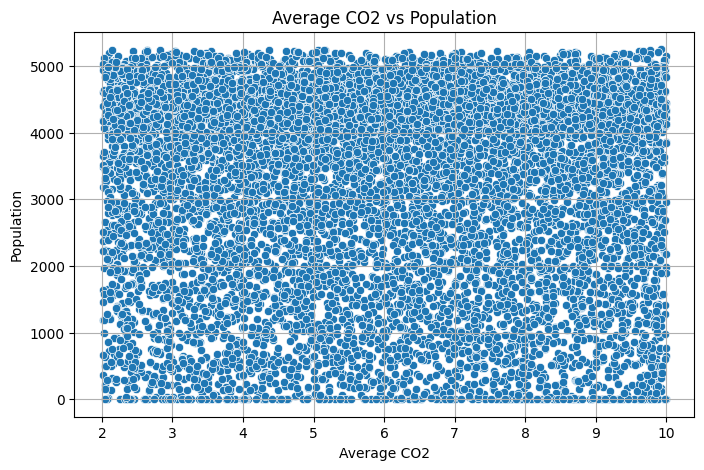

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='CO2', y='Population')
plt.title('Average CO2 vs Population')
plt.xlabel('Average CO2')
plt.ylabel('Population')
plt.grid(True)
plt.show()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.shape

(7827, 7)

In [13]:
X_test.shape

(1957, 7)

In [14]:
X_train.head()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2
7359,1127.10,5.25,0.16,0.17,10.46,7.81,4.03
8988,1414.84,1.62,0.10,0.15,24.21,7.30,2.22
8295,48.88,3.20,0.13,0.13,28.25,7.34,6.94
9629,1210.49,1.55,0.16,0.14,19.79,7.22,6.98
4058,1438.50,2.84,0.13,0.01,15.55,7.30,4.68


In [15]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [16]:
y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
r2_rf = r2_score(y_test, y_pred)

Mean Absolute Error: 258.786528666326
Mean Squared Error: 91937.06757229102
R2 Score: 0.9575439609155133


In [17]:
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)

LinearRegression()

In [18]:
y_predlinear = linearmodel.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_predlinear))
print("Mean Squared Error:", mean_squared_error(y_test, y_predlinear))
print("R2 Score:", r2_score(y_test, y_predlinear))
r2_lr = r2_score(y_test, y_predlinear)

Mean Absolute Error: 1260.7380413828141
Mean Squared Error: 2168329.8255800204
R2 Score: -0.0013229511643597647


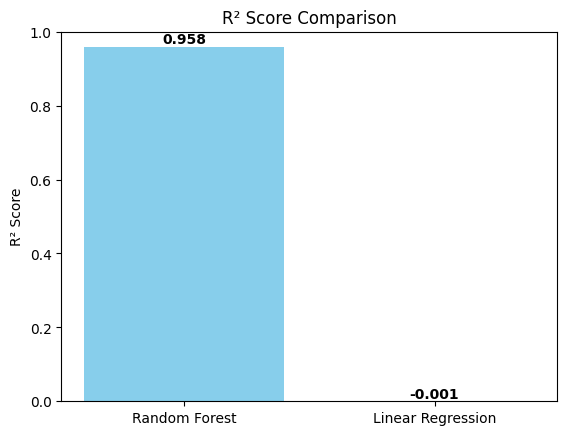

In [19]:
models = ['Random Forest', 'Linear Regression']
scores = [r2_rf, r2_lr]

plt.bar(models, scores, color=['skyblue', 'lightgreen'])
plt.ylabel("R² Score")
plt.title("R² Score Comparison")
plt.ylim(0, 1)   # since R² ranges from -∞ to 1, adjust if needed
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, str(round(v, 3)), ha='center', fontweight='bold')
plt.show()

In [20]:
import joblib

joblib.dump(model, "algaemodel.pkl")

['algaemodel.pkl']